In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/content/archive (1).zip", encoding='latin-1')

In [3]:
df.head()

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznañ,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0


In [4]:
df .tail()

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
23759,23759,Stare Miasto Naramowice,Poznañ,0.0,3976.0,52.449649,16.949408,543000.0,4.0,77.00,2020.0
23760,23760,W³ochy,Warszawa,4.0,10206.0,52.186109,20.948438,910000.0,3.0,71.00,2017.0
23761,23761,Nowe Miasto Malta ul. Katowicka,Poznañ,0.0,4952.0,52.397345,16.961939,430695.0,3.0,50.67,2022.0
23762,23762,Podgórze Duchackie Walerego S³awka,Kraków,6.0,24148.0,50.024231,19.959569,359000.0,2.0,38.86,2021.0
23763,23763,Ursynów,Warszawa,2.0,10889.0,52.141039,21.032321,604800.0,3.0,63.00,1978.0


In [5]:
df.describe()

,Unnamed: 0,floor,id,latitude,longitude,price,rooms,sq,year
count,23764.000000,23764.000000,23764.000000,23764.000000,23764.000000,2.376400e+04,23764.000000,2.376400e+04,23764.00000
mean,11881.500000,2.808744,15621.964484,51.374874,19.861773,6.493536e+05,2.620771,1.027249e+02,2000.55117
std,6860.220235,2.463467,8617.293898,1.099836,1.447186,5.326970e+05,0.996530,6.533688e+03,48.31402
min,0.000000,0.000000,1.000000,49.933056,4.204796,5.000000e+03,1.000000,8.800000e+00,70.00000
25%,5940.750000,1.000000,8420.750000,50.066489,19.916563,4.115461e+05,2.000000,4.200000e+01,1985.00000
50%,11881.500000,2.000000,15637.500000,52.193987,19.999330,5.200000e+05,3.000000,5.389500e+01,2019.00000
75%,17822.250000,4.000000,23111.250000,52.267594,20.996180,6.999990e+05,3.000000,6.891500e+01,2021.00000
max,23763.000000,10.000000,30308.000000,54.435238,30.319403,1.500000e+07,10.000000,1.007185e+06,2980.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23764 entries, 0 to 23763
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23764 non-null  int64  
 1   address     23764 non-null  object 
 2   city        23764 non-null  object 
 3   floor       23764 non-null  float64
 4   id          23764 non-null  float64
 5   latitude    23764 non-null  float64
 6   longitude   23764 non-null  float64
 7   price       23764 non-null  float64
 8   rooms       23764 non-null  float64
 9   sq          23764 non-null  float64
 10  year        23764 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


In [7]:
df.isnull().sum()

Unnamed: 0    0
address       0
city          0
floor         0
id            0
latitude      0
longitude     0
price         0
rooms         0
sq            0
year          0
dtype: int64

In [8]:
df.duplicated().sum()

0

<Axes: xlabel='rooms', ylabel='price'>

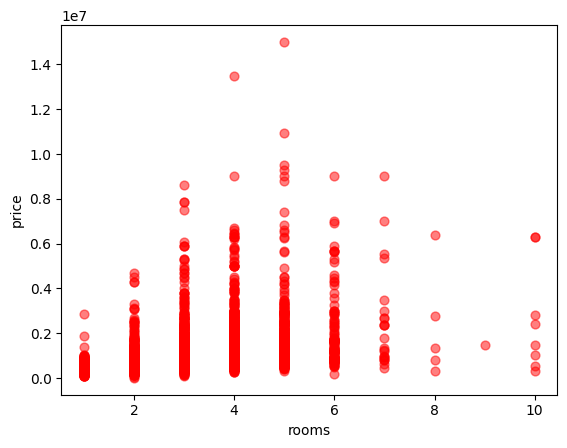

In [9]:
df.plot(kind = 'scatter', x = 'rooms', y = 'price', s= 40, c = 'red', alpha = 0.5)

<ipython-input-10-cf978b1350bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=floor_count.index, y=floor_count.values, palette= 'viridis')


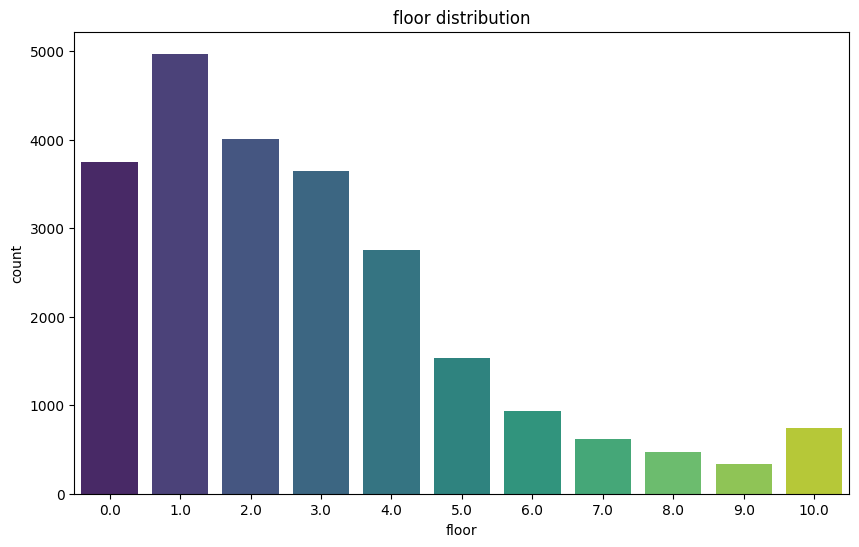

In [10]:
floor_count = df['floor'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=floor_count.index, y=floor_count.values, palette= 'viridis')
plt.xlabel('floor')
plt.ylabel('count')
plt.title('floor distribution')
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['city'] = encoder.fit_transform(df['city'])

In [12]:
encoding_col = ['city', 'address']
for col in encoding_col:
  df[col] = encoder.fit_transform(df[col])

In [13]:
df

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,2765,0,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,2892,2,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,1373,0,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,957,1,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,2359,2,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
23759,23759,3564,1,0.0,3976.0,52.449649,16.949408,543000.0,4.0,77.00,2020.0
23760,23760,4758,2,4.0,10206.0,52.186109,20.948438,910000.0,3.0,71.00,2017.0
23761,23761,2233,1,0.0,4952.0,52.397345,16.961939,430695.0,3.0,50.67,2022.0
23762,23762,2565,0,6.0,24148.0,50.024231,19.959569,359000.0,2.0,38.86,2021.0


In [14]:
x = df.drop('price', axis=1)
y= df['price']


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1,1))

In [16]:
x

array([[0.00000000e+00, 5.10335917e-01, 0.00000000e+00, ...,
        2.22222222e-01, 6.47850892e-05, 6.70446735e-01],
       [4.20822287e-05, 5.33776301e-01, 1.00000000e+00, ...,
        0.00000000e+00, 1.54689914e-05, 6.70446735e-01],
       [8.41644573e-05, 2.53414544e-01, 0.00000000e+00, ...,
        1.11111111e-01, 2.79990731e-05, 6.52920962e-01],
       ...,
       [9.99915836e-01, 4.12144703e-01, 5.00000000e-01, ...,
        2.22222222e-01, 4.15716734e-05, 6.70790378e-01],
       [9.99957918e-01, 4.73421927e-01, 0.00000000e+00, ...,
        1.11111111e-01, 2.98458204e-05, 6.70446735e-01],
       [1.00000000e+00, 7.43632337e-01, 1.00000000e+00, ...,
        2.22222222e-01, 5.38138213e-05, 6.55670103e-01]])

In [17]:
y

array([[0.04961654],
       [0.01570844],
       [0.02814271],
       ...,
       [0.02838913],
       [0.02360787],
       [0.04      ]])

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 0)

In [19]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(x_test)

In [21]:
y_pred

array([[0.03226244],
       [0.02980714],
       [0.0608474 ],
       ...,
       [0.04342253],
       [0.03527959],
       [0.04627864]])

In [22]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.0009839193288449326


In [23]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

0.015249461985160941


In [24]:
model_acc = r2_score(y_test, y_pred)
print(model_acc)


0.2636071402541563
